## Import Packages and Data

In [1]:
import pandas as pd

In [2]:
dat=pd.read_csv("credit_history.csv")
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


## Identify and Impute Missing Values

In [3]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [4]:
dat['years'].fillna(4,inplace=True)

## Divide Data into Dependent (y) and Independent Features (X)

In [5]:
y=dat['default']

In [6]:
X=dat.drop("default",axis=1)

In [7]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


### Get Dummies for Categorical Features 

In [8]:
X=pd.get_dummies(X, drop_first=True)

In [9]:
X.head()

,amount,years,income,age,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,1,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,0,0,0,0,0,0,0,0,0
2,2400,2.0,60000.0,36,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,1,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,1,0,0,0,0,0,0,1


## Split Data into Train and Test

In [10]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

## Declare DT Instance and Build Model

In [32]:
#from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=89, criterion = 'gini')

In [33]:
clf

DecisionTreeClassifier(max_depth=3, random_state=89)

In [34]:
# trained 
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=89)

### Check Accuracy

In [35]:
# Check Score/Accuracy
clf.score(X_train,y_train)

0.622552984953891

In [36]:
pred = clf.predict(X_train)
combined = pd.DataFrame({ 'Pred': pred,
                            'Actual': y_train })

### Using sklearn metrics

#### accuracy_score

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(combined['Actual'], combined['Pred'])

0.622552984953891

#### roc_auc_score

In [38]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6234882070101656

## Plot Decision tree

In [39]:
from matplotlib import pyplot as plt

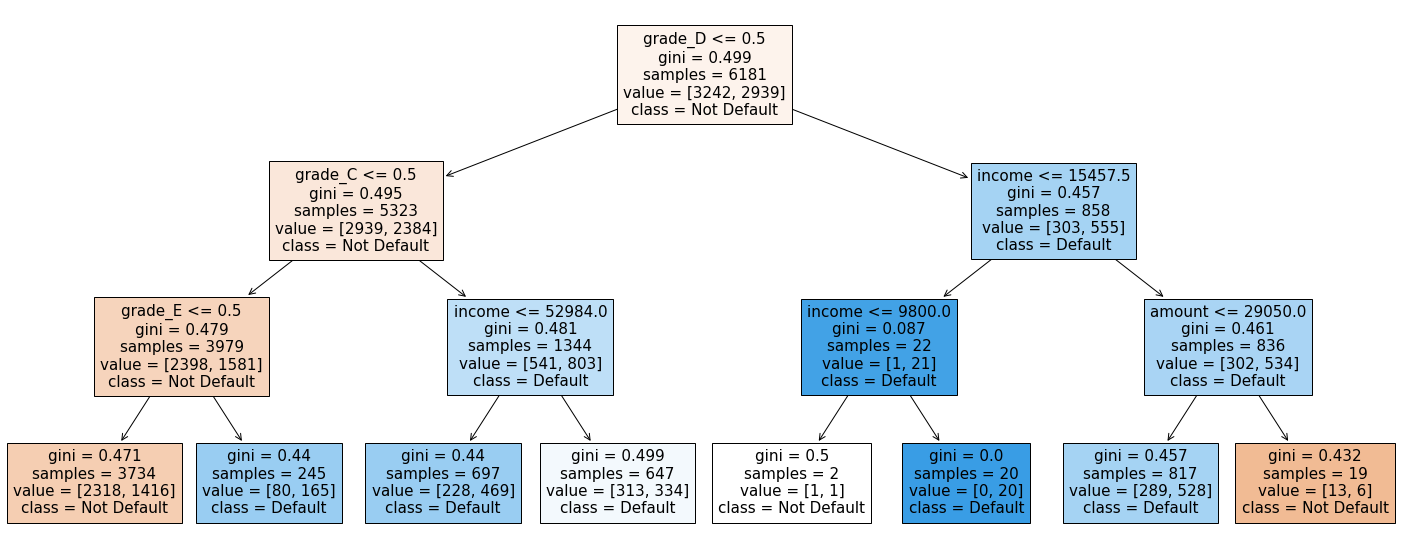

In [40]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, filled=True, feature_names = X.columns, class_names = ['Not Default','Default'])
plt.show()

In [32]:
fig.savefig("decistion_tree.png")

## Which Parameters are best?

In [42]:
# 3
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.622552984953891
0.6203104786545925


In [43]:
# 4
clf = tree.DecisionTreeClassifier(max_depth=4,random_state=200)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.6283772852289273
0.6267787839586029


In [44]:
# 5
clf = tree.DecisionTreeClassifier(max_depth=5,random_state=200)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.6363048050477269
0.628719275549806


In [45]:
# 100
clf = tree.DecisionTreeClassifier(max_depth=100,random_state=200)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.999676427762498
0.6164294954721863


### Grid Search-Cross Validation

In [46]:
clf = tree.DecisionTreeClassifier(random_state=200)

In [53]:
mod = model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,5,7,9,11,13,15], 'criterion': ['gini', 'entropy']})
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 9, 11, 13, 15],
                         'random_state': [10, 50, 200, 300]})

In [54]:
mod.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [55]:
mod.best_score_

0.6261135223803282

## How do we know if we are not over fitting?
- Check both Train and Test Accuracy

In [56]:
mod.score(X_train,y_train)

0.6363048050477269

In [57]:
mod.score(X_test,y_test)

0.628719275549806

### Example of overfitting

In [67]:
clf = tree.DecisionTreeClassifier(max_depth=100,random_state=200)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100, random_state=200)

In [68]:
clf.score(X_train,y_train)

0.999676427762498

In [69]:
clf.score(X_test,y_test)

0.6164294954721863